# Змістовний модуль 1: Оптика

## Геометрична оптика: побудова зображень і проективні перетворення 
Закони геометричної оптики дозволяють розраховувати складні оптичні системи. Принцип Ферма (закон заломлення) визначає шлях променів у оптичних системах, які збираються з лінз, дзеркал, призм та інш. Як відомо лінзи та дзеркала мають властивість концентрувати, фокусувати паралельні пучків світла у малій області - фокус, де інтенсивність світла значно зростає. Як зазначалось у попередньому розділі, такі точкоподібні області виникають як особливі точки [каустик](./phys4math_GeomOptics.ipynb#kaust).

Виведемо з законів заломленя формулу сферичної лінзи. Така лінза є тілом обертання, яке сформовано середовищем із сферичними границями із кривизнами $k_i= 1/R_i, i = 1,2$. Вісь симетрії оптичної системи називається головною оптичною віссю.

<img src="./figs/fig_lensdrawing.svg" alt="Image" width="400">
<center>Геометрична схема заломлення у лінзі</center>

З геометричної точки зору на границі поверхні відбувається поворот напряма променя на кут 

$$\alpha_{in} - \alpha_{ref} = \alpha_{in} - \arcsin{\frac{\sin{\alpha_{in}}}{n}}$$

по напряму до внутрішньої нормалі. Розрахунки спрощуються у т.з. параксіальному наближенні, коли розглядається пучок променів, який зконцентрований поблизу головної вісі аксіальної симетрії. 
Тоді можна можна вважати кути падіння малими і спростити закон заломлення (вважаємо показник заломлення зовнішнього середовища $n_1=1$):

$$\alpha_{in} - \alpha_{ref} = \alpha_{in}\frac{n-1}{n}$$

<img src="./figs/fig_lens0.svg" alt="Image" width="400">
<center>Геометрична схема заломлення у лінзі</center>

Хід променя повністю визначається заданням кута $\alpha$ по відношенню до головної вісі і ординатами $y_{1,2}$, тому заломлення на границі можна визначити матричним чином:

$$
\begin{pmatrix}
n\,\alpha_{r}\\
y_1
\end{pmatrix}
 = 
 \begin{pmatrix}
1&-(n-1)k_1\\
0&1
\end{pmatrix}
 \begin{pmatrix}
\alpha_{in}\\
y_1
\end{pmatrix}
$$

При росповсюдженні до іншої поверхні змінюється параметр $y$:

$$
\begin{pmatrix}
n\,\alpha_{r}\\
y_2
\end{pmatrix}
 = 
 \begin{pmatrix}
1&0\\
-d/n&1
\end{pmatrix}
 \begin{pmatrix}
n\,\alpha_{r}\\
y_1
\end{pmatrix}
$$

заломлення на на виході:

$$
\begin{pmatrix}
\alpha_{out}\\
y_2
\end{pmatrix}
 = 
 \begin{pmatrix}
1&-(n-1)\,k_2\\
0&1
\end{pmatrix}
 \begin{pmatrix}
n\,\alpha_{r}\\
y_2
\end{pmatrix}
$$

Ці формули зберігаються і у інших випадках поверхонь, якщо враховувати знаки кривизн від'ємними коли напрям променя є протилежний до нормалі на вході та навпаки на виході до лінзи.

d k2 (-1 + n)
1 + -------------
          n
 
       (-1 + n) (d k1 k2 (-1 + n) + (k1 + k2) n)
     -(-----------------------------------------)
>                          n

  d
-(-)
  n
 
         d k1 (-1 + n)
     1 + -------------
>              n
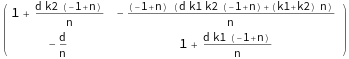

In [1]:
rmtrx1={{1,-(n-1)*k1},{0,1}};
tmtrx1={{1,0},{-d/n,1}};
rmtrx2={{1,-(n-1)*k2},{0,1}};
Simplify[rmtrx2.rmtrx1]//MatrixForm;
mtr=Simplify[rmtrx2.tmtrx1.rmtrx1];
mtr//MatrixForm

Розглядаючи промінь з $\alpha_{in} = 0$ у наближенні тонкої ($d\ll{\rm min}(R_1,R_2)$) лінзи для фокусної відстані $f \approx h_2/\alpha_{out}$ для двоякоопуклої лінзи отримаємо:

In [7]:
Simplify[mtr[[1,2]]/mtr[[2,2]]/.d->0]

-((k1 + k2) (-1 + n))

$1/f = (n-1)\left(\frac{1}{R_1}+\frac{1}{R_2}\right) + o(d)$

Зображення точок у тонкий лінзі, таким чином, будується по двом проміням, один з яких спрямовано параллельно вісі, а інший проходить через фокус. Точка перетину є зображеннням . Якщо відстань від предмета до лінзи меньша за фокусну, то не сам другий промінь, а його продовження у зворотньому напрямку повинно проходити через фокус.
Тоді проміні розбігаються лучи. Перетин цих промінів дає мніме зображення точки.

<img src="./figs/fig_lens_in.svg" alt="Image" width="250">
    <center>Геометрична схема побудови зображення (перегорнуте, дійсне) у збираючій лінзі</center>

-Graphics-
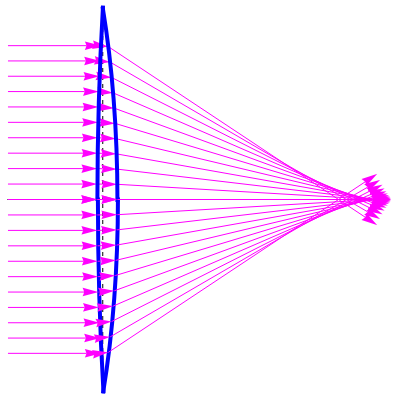

In [8]:
nref = 1.3; (*refraction index*)
r1 = 2; r2 = 5; (*radii*)
s0 = 0.8; (*scaling parameter for beam width s =< 1*)
x2 = Sqrt[r2^2 - 1]; 
n0 = 20;(*ray number parameter*)
mtrxr = {{1, 0}, {0, -1}};(*mirror mtrx*)
cntr1 = {-Sqrt[r1^2 - 1], 0};
cntr2 = {Sqrt[r2^2 - 1], 0};
seg1 = ArcSin[1/r1]; seg2 = ArcSin[1/r2];
ptin = ({{-Sqrt[r1^2 - 1], r2*Sin[#]},{x2 + r2*Cos[#],r2*Sin[#]}}&/@
Range[Pi - seg2*s0, Pi + 0 seg2*s0, 2 s0*seg2/n0]);
raysin = Arrow /@ ptin;
(******refraction of inrays on surf2*************)
beta = Chop/@ArcSin[(Last/@(Cross[{1, 0, 0}, Append[#, 0]]&/@Normalize/@(Subtract[cntr2, #]&/@
(Last /@ ptin))))/nref];
alpha = ArcCos[({1,0}.#) & /@ (Normalize /@ (Subtract[cntr2, #] & /@ (Last/@ptin)))];
dir1 = Dot[#, {1, 0}] & /@ (RotationMatrix /@ (-alpha - beta));
(*********transfer to surf1**********)
y1[x_] := Sqrt[r1^2 - (x + Sqrt[r1^2 - 1])^2]
t0 = Last/@Flatten[Last /@ Solve[# && t > 0, t]&/@
MapThread[Equal,{(y1 /@ (First /@ (Last /@ ptin + t*dir1))),
(Last /@ (Last /@ ptin + t*dir1))}]] // Quiet;
ptsout = Table[{(Last /@ ptin)[[i]], (Last /@ ptin)[[i]] + 
t0[[i]]*dir1[[i]]}, {i, Length[t0]}];
(**********refraction of rays out********)
raysout1 = Arrow /@ ptsout;
alphaout = ArcSin[nref*Sin[ArcCos[MapThread[Dot,
{dir1,Normalize /@ (Subtract[#, cntr1] & /@ (Last /@ ptsout))}]]]];
alphaout0 = ArcCos[MapThread[Dot,
{dir1,Normalize /@ (Subtract[#, cntr1] & /@ (Last /@ ptsout))}]];
dirout = MapThread[Dot, {RotationMatrix /@ (alphaout0 - alphaout), dir1}];
rayout = Arrow /@ (Transpose@ {Last /@ ptsout,Last /@ ptsout + dirout*5});
(*******graphics********)
surf1 = Circle[cntr1, r1, {0, seg1}];
surf2 = Circle[cntr2, r2, {Pi - seg2, Pi}];
(**********************)
pic = {{Dashed, Line[{{0, -1}, {0, 1}}],Line[{{-Sqrt[r1^2 - 1], 0}, {Sqrt[r2^2 - 1], 0}}]}, 
{Magenta,raysin, raysout1, rayout}, {Thickness[0.01], Blue, surf1, surf2}};
Graphics[{pic, {Thickness[0.01], Blue,GeometricTransformation[surf1, mtrxr],
GeometricTransformation[surf2, mtrxr]},
Prepend[GeometricTransformation[#, mtrxr] & /@ {raysin, raysout1,rayout}, Magenta]}, 
AspectRatio -> Min[{r1, r2}]/2,PlotRange -> All,ImageSize->400]

Тут ми бачимо приклад (монохроматичної) аберації - неточковість фокусу, яка повязана з відхиленням реальної лінзи від ідеальної (в даному випадку непараксиальність променів). Є ще хроматичні аберації які повязані з дисперсією світла, тобто залежністю показника заломлення від довжини хвилі.  [Abberation](https://en.wikipedia.org/wiki/Optical_aberration)
Дзеркала практично не мають хроматичних аберацій (закон відбивання не залежить від довжини хвилі) і тому саме дзеркальні телескопи (рефлектори) використовують в астрономії для отримання надчітких зображень.

<img src="./figs/fig_hubbletele.png" alt="Image" width="400">
<center>Діючий телескоп Hubble</center>
<img src="./figs/fig_webbtele.png" alt="Image" width="400">
<center>Телескоп нового покоління [Webb](https://www.jwst.nasa.gov) 
(запуск запланований на 31.10.2021)</center>

__Задача__ Покажіть, що довільний паралельний пучок спрямований вздовж вісі параболічного дзеркала збирається точно у фокусі (на відміну від сферичного дзеркала де це вірно тільки у параксиальному наближенні)

__Завдання__ Напішіть аналогічну програму для двояковогнутої лінзи, чи опукло-вогнутої.

<img src="./figs/fig_lens_conc.svg" alt="Image" width="300">
<center>Двояковогнута лінза</center>

__Завдання__ Побудуйте параксіальний пучок для сферичної (з обох боків) лінзи. Визначіть фокусну відстань ([див. Задачу](./phys4math_GeomOptics.ipynb#caustcup)). Побудуйте зображення тонкого предмета висоти $h <(\ll) R$ який знаходиться на оптичній вісі. 

Тепер покажемо, що тонка (ідеальна) лінза є прикладом оптичного прилада, який здійснює [проективне перетворення](./phys4math_proj.ipynb#projtransfm). Це обумовлено її головною властивістю - пучок променів параллельних оптичній вісі вона збирає у точку. Множина всіх таких точок які відповідають пучкам паралельних прямих утворює фокусну вісь (площину). З т.з. [проективної геометрії](./phys4math_proj.ipynb) це означає що перетворення яке відповідає лінзі переводить нескінечнно віддалену пряму (класси паралельних прямих), чи площину у просторовому випадку, в пряму (площину). Для спрощення будемо розглядати площинний випадок, тобто коли всі промені лежать у площині, завдяки аксиальній симетрії.

Виходячи із відповідності між пучками паралельних прямих і точками на $\infty$-вдаленій прямій, можна знайти аналітичну форму такого перетворення. <br>
Припустимо, що лінза знаходиться в початку координат вздовж вісі $y$. Тоді із геометричної відповідності променів отримаємо аналітичну форму проективного перетворення яке реалізується лінзою з фокусним параметром $f$:

\begin{equation}\label{lins_proj_xy}
  \tilde{x} = \frac{x\,f}{f-x}\,,\quad \tilde{y} = \frac{y\,f}{f-x}\,,
\end{equation}

де $(\tilde{x},\tilde{y})$ - положення образа точки $(x,y)$.
Випадок $f>0$ відповідає збираючій, а $f<0$ - розсіючій 
линзі. З \eqref{lins_proj_xy} також маємо відому формулу
тонкої лінзи:

\begin{equation}\label{lins_thin0}
  \frac{1}{\tilde{x}} = \frac{1}{x} - \frac{1}{f}
\end{equation}

В однорідних координатах \eqref{lins_proj_xy} має вигляд:

\begin{equation}\label{lins_proj}
  \tilde{X} = f\,X \,,\quad \tilde{Y} = f\,Y \,,\quad \tilde{Z} = f\,Z-X
\end{equation}

або у матричній формі:

\begin{equation}\label{lins_proj_mtrx}
\left(
  \begin{array}{c}
    \tilde{X} \\
    \tilde{Y} \\
    \tilde{Z} \\
  \end{array}
\right) = \left(
            \begin{array}{ccc}
             f & 0 & 0 \\
              0 & f & 0 \\
              -1 & 0 & f \\
            \end{array}
          \right)\,\left(
  \begin{array}{c}
    X \\
    Y \\
    Z \\
  \end{array}
\right)
\end{equation}

Неважко переконатися, що суперпозиція двох лінз з фокальними
параметрами $f_{1,2}$ еквівалентна лінзі з фокальним параметром
$f = \frac{f_1\,f_{2}}{f_{1}+f_{2}}$:

\begin{equation}\label{lins_superpos}
\left(
            \begin{array}{ccc}
              f_2 & 0 & 0 \\
              0 & f_2 & 0 \\
              -1 & 0 & f_2 \\
            \end{array}
          \right)\,\left(
            \begin{array}{ccc}
              f_1 & 0 & 0 \\
              0 & f_1 & 0 \\
              -1 & 0 & f_1 \\
            \end{array}
          \right)\, = \left(
            \begin{array}{ccc}
              f_1\,f_2 & 0 & 0 \\
              0 & f_1\,f_2 & 0 \\
              -(f_1+f_2) & 0 & f_1\,f_2 \\
            \end{array}
          \right) \simeq \left(
            \begin{array}{ccc}
              \frac{f_1\,f_{2}}{f_{1}+f_{2}} & 0 & 0 \\
              0 & \frac{f_1\,f_{2}}{f_{1}+f_{2}} & 0 \\
              -1 & 0 & \frac{f_1\,f_{2}}{f_{1}+f_{2}} \\
            \end{array}
          \right)\,.
 \end{equation}